In [ ]:
import pandas as pd
file_path = "cars.csv"
df = pd.read_csv(file_path)
df.head()


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


Shape

In [ ]:
print(df.shape)

(5076, 18)


Data Types

In [ ]:
print(df.dtypes)

Dimensions.Height                                   int64
Dimensions.Length                                   int64
Dimensions.Width                                    int64
Engine Information.Driveline                       object
Engine Information.Engine Type                     object
Engine Information.Hybrid                            bool
Engine Information.Number of Forward Gears          int64
Engine Information.Transmission                    object
Fuel Information.City mpg                           int64
Fuel Information.Fuel Type                         object
Fuel Information.Highway mpg                        int64
Identification.Classification                      object
Identification.ID                                  object
Identification.Make                                object
Identification.Model Year                          object
Identification.Year                                 int64
Engine Information.Engine Statistics.Horsepower     int64
Engine Informa

Numerical Variables

In [ ]:
numerical = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical variables:")
print(numerical)

Numerical variables:
['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width', 'Engine Information.Number of Forward Gears', 'Fuel Information.City mpg', 'Fuel Information.Highway mpg', 'Identification.Year', 'Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque']


Categorical Variables

In [ ]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical variables:")
print(categorical)

Categorical variables:
['Engine Information.Driveline', 'Engine Information.Engine Type', 'Engine Information.Transmission', 'Fuel Information.Fuel Type', 'Identification.Classification', 'Identification.ID', 'Identification.Make', 'Identification.Model Year']


**CORRELATION**

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

In [ ]:
target = ['Fuel Information.City mpg']
correlations = correlation_matrix[target].drop(target)
print("Correlations with Fuel Information.City mpg:")
print(correlations)

Correlations with Fuel Information.City mpg:
                                                 Fuel Information.City mpg
Dimensions.Height                                                 0.249385
Dimensions.Length                                                -0.018854
Dimensions.Width                                                 -0.139998
Engine Information.Number of Forward Gears                       -0.036348
Fuel Information.Highway mpg                                      0.865617
Identification.Year                                               0.092046
Engine Information.Engine Statistics.Horsepower                  -0.701537
Engine Information.Engine Statistics.Torque                      -0.754664


Duplicates

In [ ]:
df.duplicated().sum()

18

In [ ]:
df = df.drop_duplicates()

In [ ]:
X = df[['Dimensions.Height', 'Dimensions.Length', 'Engine Information.Engine Statistics.Horsepower']]
y = df['Fuel Information.City mpg']

Missing Values

In [ ]:
df.isnull().sum()

,0
Dimensions.Height,0
Dimensions.Length,0
Dimensions.Width,0
Engine Information.Driveline,0
Engine Information.Engine Type,0
Engine Information.Hybrid,0
Engine Information.Number of Forward Gears,0
Engine Information.Transmission,0
Fuel Information.City mpg,0
Fuel Information.Fuel Type,0


**MODEL TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)
residuals = Y_test - Y_pred


**MODEL EVALUATION**

In [ ]:
import numpy as np
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Fuel Information.City mpg:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Fuel Information.City mpg:
Mean Absolute Error (MAE): 2.428106316131852
Mean Squared Error (MSE): 9.75761353053237
Root Mean Squared Error (RMSE): 3.1237179018810854
R-squared (R2) Score: 0.5345867172517564


**COST FUNCTION**

In [ ]:
cost_history = []
num_iterations = 1000
alpha = 0.01

In [ ]:
Y_train_np = Y_train.values.reshape(-1,1)

w = np.zeros((X_train_scaled.shape[1], Y_train_np.shape[1]))

for i in range(num_iterations):
    error = np.dot(X_train_scaled, w) - Y_train_np
    gradients = (2/len(Y_train_np)) * np.dot(X_train_scaled.T, error)

    gradients = np.clip(gradients, -1e2, 1e2)
    w = w - alpha * gradients

    cost = np.mean(error ** 2)
    cost_history.append(cost)

    if i % 100 == 0:
      print("interation",i,": cost",cost)

interation 0 : cost 317.7634700939199
interation 100 : cost 307.82331725740994
interation 200 : cost 307.6779244725204
interation 300 : cost 307.67485065467565
interation 400 : cost 307.6747639580506
interation 500 : cost 307.6747611518557
interation 600 : cost 307.67476105625855
interation 700 : cost 307.67476105294287
interation 800 : cost 307.67476105282714
interation 900 : cost 307.6747610528231


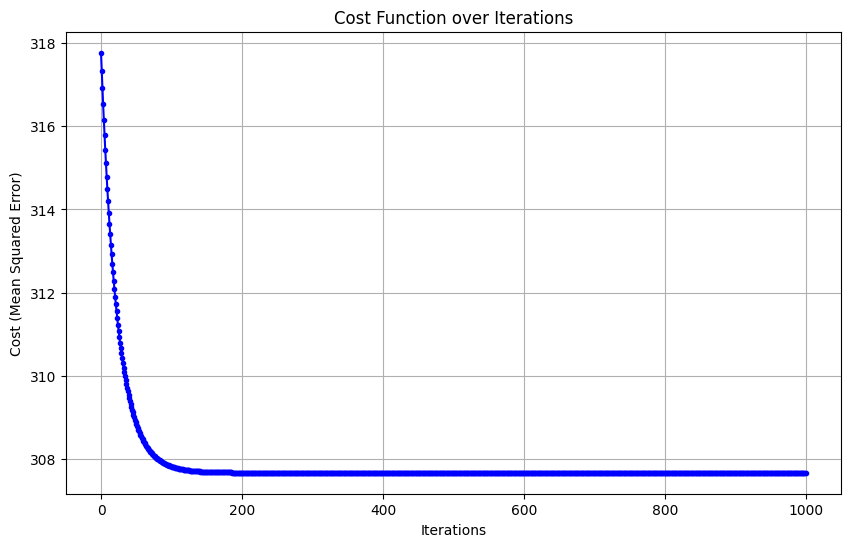

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, marker='o', linestyle='-', color='b',markersize=3)
plt.xlabel('Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

**OUTLIERS**

In [ ]:
num_features = numerical
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_IQR = ((df[num_features] < lower_bound) | (df[num_features] > upper_bound)).sum()
print("Outliers (IQR Method):")
print(outliers_IQR)

df_cleaned = df[~((df[num_features] < lower_bound) | (df[num_features] > upper_bound)).any(axis=1)]
print("shape of the dataset before removing outliers:",df.shape)
print("Shape of the dataset after removing outliers:", df_cleaned.shape)

Outliers (IQR Method):
Dimensions.Height                                    0
Dimensions.Length                                    0
Dimensions.Width                                     0
Engine Information.Number of Forward Gears          91
Fuel Information.City mpg                           36
Fuel Information.Highway mpg                        16
Identification.Year                                  0
Engine Information.Engine Statistics.Horsepower    124
Engine Information.Engine Statistics.Torque         36
dtype: int64
shape of the dataset before removing outliers: (5058, 18)
Shape of the dataset after removing outliers: (4806, 18)


**Correlation Heatmap**

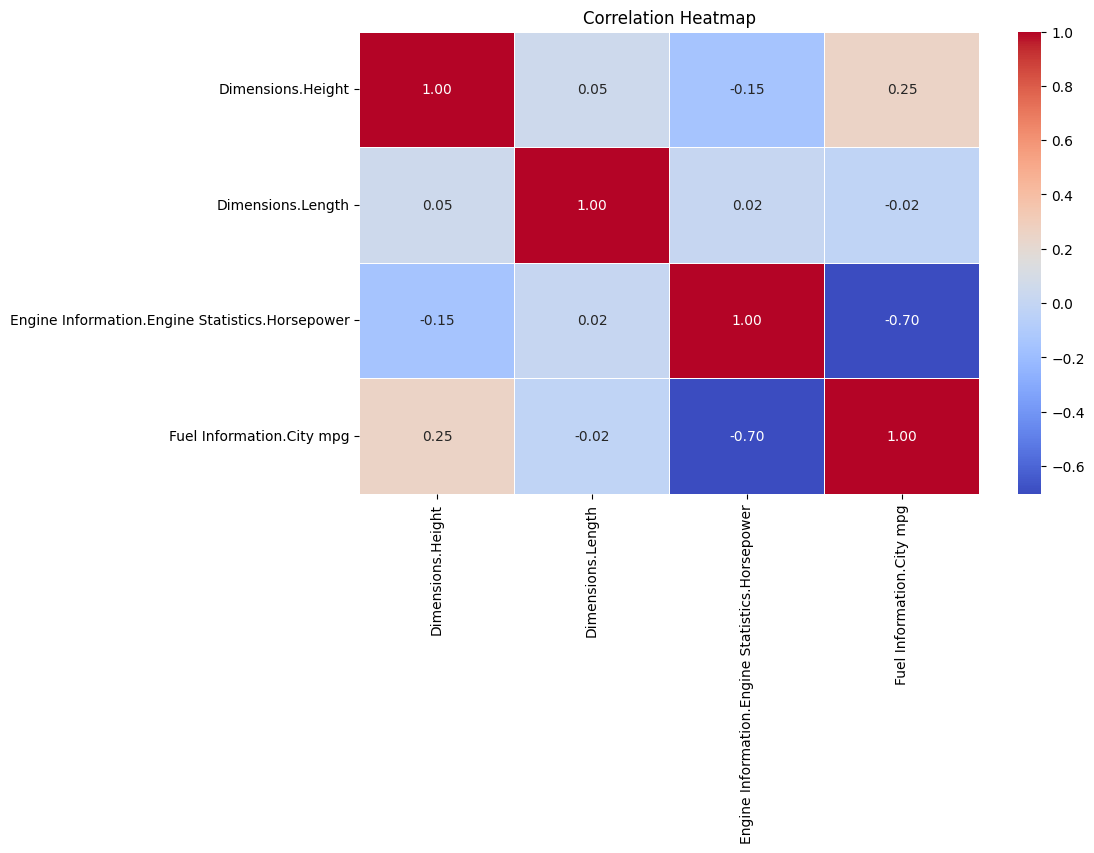

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
corr_matrix = df[X.columns.tolist() + ['Fuel Information.City mpg']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**SCATTER PLOT**

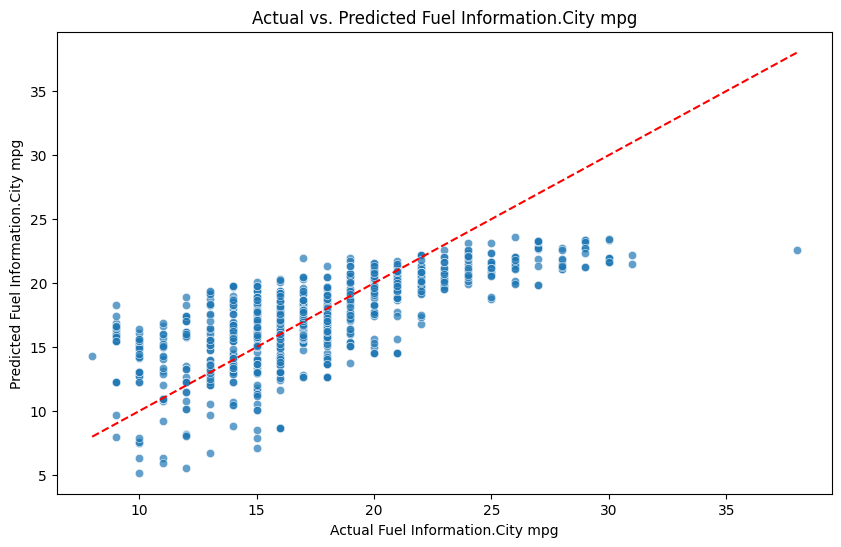

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.7)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)], color='red', linestyle='--')
plt.xlabel('Actual Fuel Information.City mpg')
plt.ylabel('Predicted Fuel Information.City mpg')
plt.title('Actual vs. Predicted Fuel Information.City mpg')
plt.show()

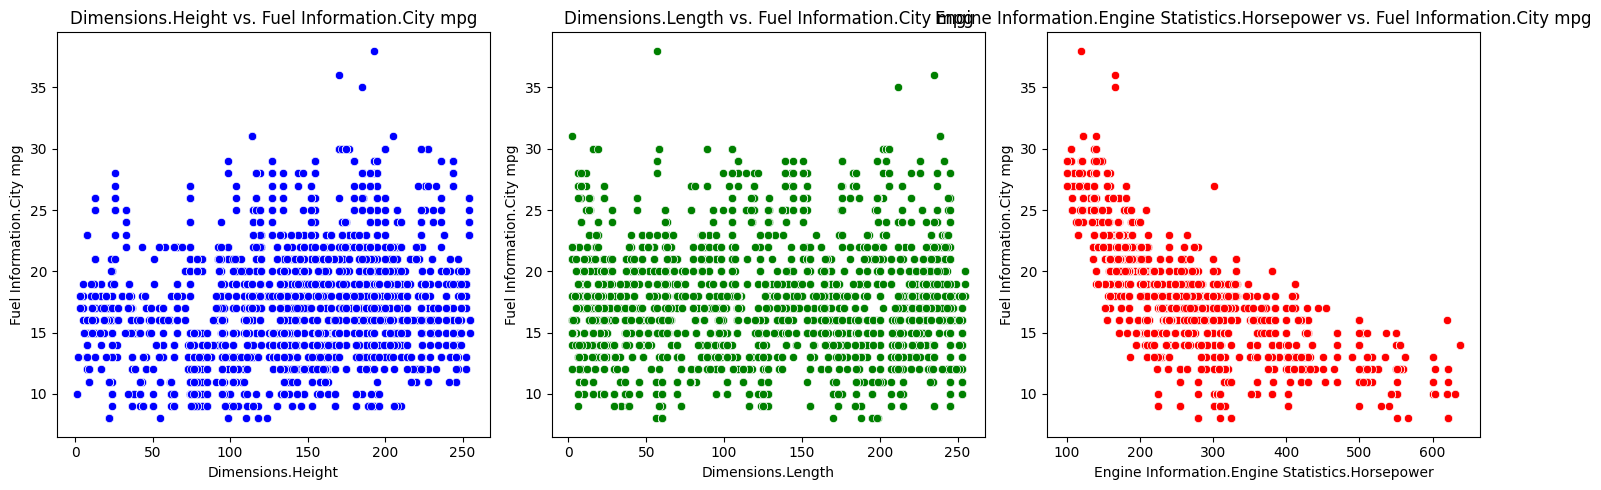

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colors = ['b', 'g', 'r', ]

for i, predictor in enumerate(X):
    sns.scatterplot(x=df[predictor], y=df['Fuel Information.City mpg'], ax=axes[i], color=colors[i])
    axes[i].set_title(f'{predictor} vs. Fuel Information.City mpg')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Fuel Information.City mpg')

plt.tight_layout()
plt.show()